# Simple Probability Model

The following example assumes all points in the unit square are equally likely to occur. Let *A* be the event that a randomly selected point is in some finite region contained in the sample space. As probabalistic model we let the probability of the event *A* be equal to the area of *A*. Selecting *N* random *(x,y)* pairs using a uniform distribution, the observed values of the events $A_1, A_2, A_3\hspace{1pt}$ are compared to the theoretical model.

		Theoretical 	 Observed
p(A1)		0.35		0.346
p(A1 & A2)	0.06		0.06
p(A1 & A2 & A3)	0.020000000000000004		0.018


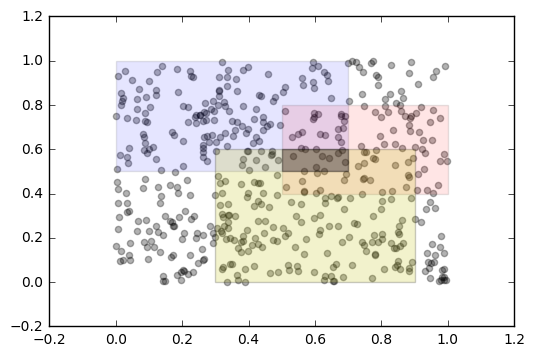

In [1]:
from numpy import random as r
import matplotlib.pyplot as plt
from functools import reduce

#draw a uniform random sample on the unit square
N = 500
sample = r.rand(2,N)
plt.scatter(sample[0],sample[1], c='k', alpha = 0.3)

#calculate observed probabilities
def inBoundsCount(v,x1,x2,y1,y2):
    if v[0]>=x1 and v[0]<=x2 and v[1]>=y1 and v[1]<=y2: return 1
    else: return 0

def pA(x1, x2, y1, y2):
    return reduce(lambda s,v: s + inBoundsCount(v, x1,x2,y1,y2), sample.T, 0)/float(N)

print("\t\tTheoretical \t Observed")
print("p(A1)\t\t{0}\t\t{1}".format(.5*.7, pA(0, .7, .5, 1.0)))
print("p(A1 & A2)\t{0}\t\t{1}".format(.2*.3,pA(.5, .7, .5, .8)))
print("p(A1 & A2 & A3)\t{0}\t\t{1}".format(.2*.1, pA(.5, .7, .5, .6)))


#fill in regions corresponding to events A1, A2, A3
#args to fill are X coords, Y coords
plt.fill([0, .7, .7, 0], [.5, .5, 1, 1],'b',alpha=0.1)
plt.fill([.5, 1.0, 1.0, .5], [.4, .4, .8, .8], 'r', alpha = 0.1)
plt.fill([.3, .9, .9, .3], [0, 0, .6, .6], 'y', alpha = 0.2)
plt.fill([.5, .7, .7, .5], [.5, .5, .6,.6], 'k', alpha = .3)

plt.show()

# Common Ground


Much of the treatment of random variables (RV) makes a distinction between **discrete** and **continous** random variables. For example, discrete RVs are associated with a probability **mass** function (PMF) that is a function from a discrete value, i.e. a possible outcome, and the probability that the RV takes that outcome. Continuous RVs are associated with a probability **density** function (PDF) that is a function from any value on the real line to the probability **density** of the RV at that value (thought of as the density per unit length). 

The **cumulative distribution function** (CDF) is a single concept that applies to all RVs. The CDF of a RV *X*, denoted $F_X\hspace{1pt}$ defines the probability $P\left(X\le x\right)\hspace{1pt}$

$$F_X\left(x\right) = P\left(X\le x\right) =  \left\{ \begin{eqnarray} \sum_{k\le x} p_X\left(k\right) &,& \quad \mbox{if}\hspace{3pt} X \hspace{2pt} \mbox{is discrete} \cr
\int_{-\infty}^x f_X\left(t\right)dt&,& \quad \mbox{if}\hspace{3pt} X \hspace{2pt} \mbox{is continuous} \end{eqnarray}\right.$$

## Properties of the CDF

If *X* is discrete and takes integer values, the PMF and the CDF can be obtained as

$$F_X\left(k\right) = \sum_{i=-\infty}^k p_X\left(i\right)$$

$$p_X\left(k\right) = P\left(X\le k\right) - P\left(X \le k-1\right) = F_X\left(k\right) - F_X\left(k-1\right)$$

for all integers *k*.

If *X* is a continuous RV, the PDF and CDF can be obtained as

$$F_X\left(x\right) = \int_{-\infty}^x f_X\left(t\right)dt$$

$$f_X\left(x\right) = \frac{dF_X}{dx}\left(x\right)$$

### Example: PMF/PDF For Maximum of Several Random Variables

Consider the set of random variables $\mathbf{X}=\left\{X_1,\ldots,X_N\hspace{1pt}\right\}$ where the random variables in **X** *are independent*. Let *Z* be the random variable equal to the maximum value over the set **X** for a given observation of **X**. We can obtain the PMF or PDF of **Z** by first considering the CDF

$$\begin{eqnarray}F_Z\left(z\right) &=& P\left(X_1\le z\right)\ldots P\left(X_N \le z\right) \cr
&=& F_{X_1}\left(z\right)\ldots F_{X_N}\left(z\right)\end{eqnarray}$$

By the properties of the CDF, the PMF or PDF can be obtained. 

Consider the case where **X** consists of two *independent Normal random variables* with means $\mu_i = 0, 3\hspace{2pt}$ respectively and variances $\sigma^2 = 1, 16\hspace{2pt}$ respectively and let **Z** be the maximum of **X**. 

Recall that for an arbitrary *Gaussian* random variable *X* with mean $\mu\hspace{1pt}$ and standard deviation $\sigma\hspace{1pt}$ we have

$$F_X\left(x\right) = \Phi \left(\frac{x-\mu}{\sigma}\right)$$

where 

$$\Phi\left(x\right) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^x e^{-t^2/2}dt$$

is the CDF of the *standard Normal*, that is a Gausian RV with zero mean and unit variance. Thus CDF of Z is

$$F_Z\left(z\right) = \Phi\left(z\right) \cdot \Phi\left(\frac{z-3}{4}\right)$$

Now we can obtain the PDF of **Z** by applying the [Fundamental Thoerem of Calculus](http://en.wikipedia.org/wiki/Fundamental_theorem_of_calculus) and the [chain rule](http://en.wikipedia.org/wiki/Chain_rule) to obtain

$$\begin{eqnarray}f_Z\left(z\right) &=& \Phi\left(z\right) \cdot \frac{d}{dz}\Phi\left(\frac{z-3}{4}\right) + \Phi\left(\frac{z-3}{4}\right) \cdot \frac{d}{dz}\Phi\left(z\right) \cr
&=& \Phi\left(z\right)\cdot \frac{1}{4}\cdot f_Z\left(\frac{z-3}{4}\right) +\Phi\left(\frac{z-3}{4}\right)\cdot f_Z\left(z\right) 
\end{eqnarray}$$

where

$$f_Z\left(z\right) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}$$

Below we attempt to confirm (technically we are only "not contradicting") this result via simulation. We will take *N* observations of **Z** for some *large N* and determine if the observed distribution *closely matched* the predicted one. 


# Continuous Random Variables

A random variable *X* is called **continuous** if there is a nonnegative function $f_X\hspace{1pt}$, called the **probability density function** (or PDF) such that

$$P\left(X\in B\right) = \int_B f_X\left(x\right)dx$$

for every subset *B* of the real line. The probability that the value of *X* falls within some interval is 

$$P\left(a\le X \le b\right) = \int_a^b f_X\left(x\right)dx$$

Finally, the normalization property must hold

$$\int_{-\infty}^{\infty} f_X\left(x\right)dx = 1$$

**Expected Value**

The expected value (or mean) of a continuous RV is defined by

$$E\left[X\right] = \int_{-\infty}^{\infty} x f_X\left(x\right)dx$$

Note that the expected value is well-defined if $\int_{-\infty}^{\infty} \left|x\right| f_X\left(x\right)dx$ is well defined. This is not the case, for example, for certain power law distributions. 

Likewise, any real-valued function, $Y=g\left(X\right)\hspace{1pt}$, of a continuous RV *X*, is itself a RV (possibly discrete) whose expected value is

$$E\left[g\left(X\right)\right] = \int_{-\infty}^{\infty} g\left(x\right)f_X\left(x\right)dx$$

**Variance**

The variance of a continuous RV, *X* is defined by

$$var\left(X\right) = E\left[(X-E\left[X\right])^2\right] = \int_{-\infty}^{\infty} \left(x-E\left[X\right]\right)^2 f_X\left(x\right)dx$$

which is equivalent to

$$var\left(X\right) = E\left[X^2\right] - \left(E\left[X\right]\right)^2$$

**Joint PDFs of Multiple Random Variables**

Two random variables, *X*, and *Y* are **jointly continutuous** if there is a **joint PDF** $f_{X,Y}\hspace{1pt}$ such that

$$P\left(\left(X,Y\right) \in B\right) = \int \int_{\left(x,y\right)\in B} f_{X,Y}\left(x,y\right) dx dy$$

for every subset *B* of the $R^2\hspace{1pt}$ and the normalization property holds

$$\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} f_{X,Y}\left(x,y\right) dx dy = 1$$

One can view $f_{X,Y}$ as the probability per unit area at $\left(x,y\right)$.

The **marginal** PDF of *X* (and similarly for *Y*) is

$$f_X\left(x\right) = \int_{-\infty}^{\infty} f_{X,Y}\left(x,y\right) dy$$

Note that calculating the marginal PDF, $f_X\left(x\right)\hspace{1pt}$ typically involves finding a parametric equation, $x=g\left(y\right)\hspace{1pt}$ so that

$$f_X\left(x\right) = \int_{-\infty}^{g\left(x\right)} f_{X,Y}\left(x,y\right)dy$$

**Example: Buffon's Needle**

Consider a surface ruled with parallel lines separated by a distance *d* and a needle of length $l \lt d\hspace{1pt}$. Suppose the needle is randomly placed on the surface. The probability that the needle will intersect a line is derived as follows. Let *X* by the vertical distance from the *midpoint of the needle* to the nearest line and let $0\le\Theta\le\pi/2\hspace{2pt}$ by the acute angle formed by the needle (extended infinitely) and the lines. Assuming the placement is uniformly random the **joint PDF** is

$$f_{X,\Theta}\left(x,\theta\right) = \left\{ \begin{eqnarray} 4/\left(\pi d\right) &,& \quad \mbox{if} \hspace{2pt} x\in
\left[0,d/2\right] \hspace{2pt} \theta \in \left[0,\pi/2\right] \cr
0 &,& \quad\mbox{otherwise}\end{eqnarray}\right.$$

The needle will intersect a line iff $X\le \frac{l}{2}\sin\Theta\hspace{2pt}$, so the probability of intersection is

$$\begin{eqnarray} P\left(X\le (l/2)\sin\Theta\right)&=& 
\int\int_{x\le(l/2)\sin\theta}f_{X,\Theta}\left(x,\theta\right)dxd\theta \cr 
&=& \frac{4}{\pi d} \int_0^{\pi/2}\int_0^{(l/2)\sin\theta}dx d\theta \cr
&=&\frac{2l}{\pi d}\end{eqnarray}$$

Note that this example, [rather famously](http://en.wikipedia.org/wiki/Buffon's_needle#Estimating_.CF.80), provide an experimental method for calculating $\pi\hspace{1pt}$. By conducting the above experiment enough times we can approximate $\pi\hspace{1pt}$ as

$$\pi = \frac{2l}{d}\frac{1}{P_{exp}\left(X\le (l/2)\sin\Theta\right)}$$

where $P_{exp}\left(X\le (l/2)\sin\Theta\right)\hspace{1pt}$ is the observed value. If we choose $d=2l\hspace{1pt}$ then the observed probability will equal the inverse of the estimate for $\pi\hspace{1pt}$. We simulate this below:

Theoretical Probability = 0.3183098861837907
Observed Probability = 0.31866
Final estimate of pi = 3.138140965292161
Python pi = 3.141592653589793


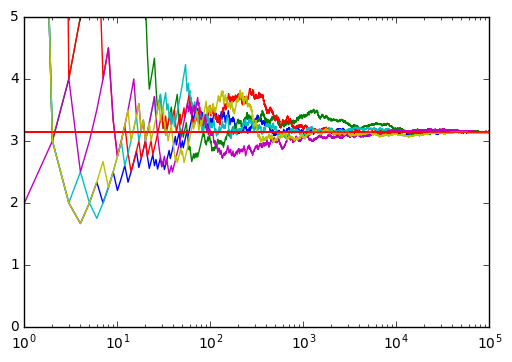

In [13]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import math
import numpy

#choose d = 2l
nl = 1 #needle length
d = 2*nl

#joint uniform random variable
rv = uniform(loc=[0,0], scale=[d/2.0, math.pi/2.0])

#number of times needle is randomly placed
numSamples = 100000

samples = rv.rvs(size=(numSamples,2))
intersections = [samples[i][0]<=(nl/2.0)*math.sin(samples[i][1]) for i in range(numSamples)]
piEst = [int(intersections[0])]
for i in range(numSamples-1): piEst.append(piEst[i] + int(intersections[i+1]))
piEst = [(i+1)/max(.1, float(piEst[i])) for i in range(numSamples)]

print("Theoretical Probability = {0}".format(2*nl/math.pi/float(d)))
print("Observed Probability = {0}".format(numpy.sum(intersections)/float(numSamples)))
print("Final estimate of pi = {0}".format(piEst[numSamples-1]))
print("Python pi = {0}".format(math.pi))

plt.plot(piEst)
plt.plot([math.pi for i in range(numSamples)], 'r')
plt.ylim(0,5)
plt.xscale('log')

plt.show()

**Joint CDF**

If *X* and *Y* are two continuous RVs their joint CDF is

$$F_{X,Y} = P\left(X\le x, Y\le y\right) = \int_{-\infty}^x \int_{-\infty}^y f_{X,Y}\left(s,t\right)dtds$$

Conversely, the PDF can be obtained by differentiating:

$$f_{X,Y}\left(x,y\right) = \frac{\partial^2 F_{X,Y}}{\partial x \partial y}\left(x,y\right)$$

**Expectation**

If *X* and *Y* are continuous RVs, then $Z=g\left(X,Y\right)\hspace{1pt}$ is also a RV with exepcted value

$$E\left[g\left(X,Y\right)\right] = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}g\left(x,y\right)f_{X,Y}\left(x,y\right)dxdy$$

where again we note that, in general, $E\left[g\left(x,y\right)\right] \ne g\left(E\left[X,Y\right]\right)\hspace{1pt}$ although the equality does hold for linear functions of *X* and *Y*.

**Conditioning a Continuous RV on an Event**

The **conditional PDF** of a continuous RV *X*, given and **event** *A* is defined ad

$$P\left(X\in B \vert A\right) = \int_B f_{X\vert A} \left(x\right) dx$$

In the **special case** where the conditioning event is of the form $\left\{X \in A\right\}\hspace{1pt}$ we have

$$f_{X \vert \left\{ X \in A \right\} } =  \left\{ \begin{eqnarray} \frac{f_X\left(x\right)}{P\left(X\in A\right)} &,& \quad \mbox{if} \quad x\in A \cr
0 &,& \mbox{otherwise} \end{eqnarray}\right.$$

An additional useful theorem is the following version of the *total probability theorem*. Let $A_1,\ldots,A_n\hspace{1pt}$ be *disjoint* events that form a partition of the sample space, then

$$f_X\left(x\right) = \sum_{i=1}^{n}P\left(A_i\right) f_{X\vert A_i}\left(x\right)$$

**Example: Exponential is Memoryless**

Assume the time, *T*, until an atom undergoes a radio active decay is modelled as an exponential RV with paramter $\lambda\hspace{1pt}$. Now assume that at time *t* units the atom has *not yet decayed* corresponding to the event $A=\left\{T\gt t\right\}\hspace{1pt}$. Let *X* be the *additional* time until the atom decays. What is the conditional CDF of *X* given the event *A*? 

The analytical solution is given by

$$\begin{eqnarray}P\left(X\gt x \vert A\right) &=& P\left(T\gt t + x \vert T\gt t\right) \cr
&=& \frac{P\left(\left\{T\gt t+x\right\} \cap \left\{T\gt t \right\}\right)}{P\left(T\gt t\right)} \cr
&=& \frac{e^{-\lambda\left(t+x\right)}}{e^{-\lambda t}} = e^{-\lambda t} \end{eqnarray}$$

The result implies that if the waiting time for an event is modelled with an exponential RV and the event has not occurred after some time *t*, the **remaining** time to completion has the same CDF as when the wait started, that is there is no memory of past waiting time. Further, we know that the PDF is equal to the derivative of the CDF so the PDF is also the same.

We simulate an example below. We will take many samples from an exponential RV. For any values that are greater than the mean, we will consider the additional wait time beyond the mean and calculate the PDF and CDF for those values. Note that if the original RV is less than or equal to the mean we will not have a realization of the additional wait time. Note we will calculate the CDF of the observed data using [cumulative frequency analysis](http://en.wikipedia.org/wiki/Cumulative_frequency_analysis). 

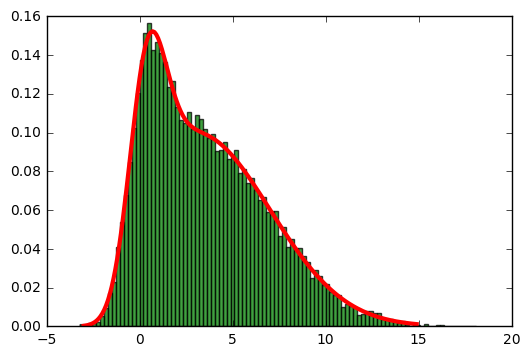

In [2]:
import scipy.stats
numSamples = 20000

def fZ(z):
    rv = scipy.stats.norm(loc=0, scale=1) #standard normal
    z1 = (z-3)/(4.0)
    return rv.cdf(z)*rv.pdf(z1)/(4.0) + rv.cdf(z1)*rv.pdf(z)

raynge = [(-3 + i/10.0) for i in range(180)]
predicted = [fZ(z) for z in raynge]
n1 = scipy.stats.norm(loc=0, scale=1)
n2 = scipy.stats.norm(loc=3, scale =4)

X1 = n1.rvs(size=numSamples)
X2 = n2.rvs(size=numSamples)
Z = [max(X1[i],X2[i]) for i in range(numSamples)]

fig = plt.figure()
ax = fig.add_subplot(111)

n, bins, patches = ax.hist(Z, 100, normed=1, facecolor='green', alpha=0.75)
ax.plot(raynge,predicted,'r', linewidth=3)

plt.show()


# Limit Theorems


Consider a sequence $X_1, X_2, \ldots \hspace{1pt}$ of independent i.i.d. random variables with mean $\mu\hspace{1pt}$ and variance $\sigma^2\hspace{1pt}$. Let 

$$S_n = \sum_{i=1}^n X_i$$

be a partial sum of the random variables. By **independence** we have

$$var\left(S_n\right) = \sum_{i=1}^n var\left(X_i\right) = n \sigma^2$$

We now define a new random variable, called the **sample mean** given by 

$$M_n = \frac{1}{n}\sum_{i=1}^n X_i = \frac{S_n}{n}$$

which has expected value and variance

$$E\left[M_n\right] = \mu \quad var\left(M_n\right) = \frac{\sigma^2}{n}$$

Notice that the variance of the sample mean decreases to zero as *n* increases, implying that most of the probability distribution for $M_\hspace{1pt}$ is close to the mean value. 

We also introduce the random variable 

$$Z_n = \frac{S_n - n\mu}{\sigma \sqrt{n}}$$

for which 

$$E\left[Z_n\right] = 0 \quad var\left(Z_n\right) = 1$$

## Markov Inequality


If a RV *X* can only take nonnegative values, then

$$P\left(X \ge a \right) \le \frac{E\left[X\right]}{a} \quad \forall a \gt 0$$


## Chebyshev Inequality


If *X* is a RV with mean $\mu \hspace{1pt}$ and variance $\sigma^2\hspace{1pt}$, then

$$P\left(\left| X - \mu \right| \ge c \right) \le \frac{\sigma^2}{c^2} \quad \forall c \gt 0$$

An alternative form of the Chebyshev inequality is obtained by letting $c=k\sigma\hspace{1pt}$ where *k* is postive. This gives

$$P\left(\left| X - \mu \right| \ge k\sigma \right) \le \frac{1}{k^2} $$

which indicates that the probability of an observation of the random variable *X* being more than *k* standard deviations from the mean is less than or equal to $$1/k^2\hspace{1pt}$. 


## Weak Law of Large Numbers

Let $X_1, X_2, \ldots \hspace{1pt}$ be i.i.d. RVs with mean $\mu\hspace{1pt}$. For **every** $\epsilon > 0 \hspace{1pt}$ 

$$\lim_{n\rightarrow \infty} P\left(\left|M_n - \mu \right| \ge \epsilon \right)= 0$$


## Convergence in Probability


Let $Y_1, Y_2, \ldots \hspace{1pt}$ be a sequence of RVs, *not necessarily independent*, and let *a* be a real number. We say that the sequence $Y_n \hspace{1pt}$ **converges to** *a* **in probability** if for every $\epsilon \gt 0 \hspace{1pt}$ we have

$$\lim_{n\rightarrow 0} P\left( \left| Y_n -a \right|  \gt \epsilon \right) = 0$$

This implies that the probability distribution of the random variables, $Y_n \hspace{1pt}$ converges to a distribution that is contained within a space of width $2\epsilon\hspace{1pt}$ around the point *a*. However this says nothing about the shape of the distribution. 

This can be rephrased in the following way: For every $\epsilon \gt 0 \hspace{1pt}$ and for any $\delta \gt 0 \hspace{1pt}$, there exists $n_0 \hspace{1pt}$ such that

$$ P\left( \left| Y_n -a \right|  \gt \epsilon \right) \le \delta \quad \forall n \ge n_0$$

where $\epsilon \hspace{1pt}$ is known as the **accuracy** and $\delta \hspace{1pt}$ is known as the **confidence**. 


## The Central Limit Theorem


Let $X_1, X_2, \ldots\hspace{1pt}$ be a sequence of i.i.d. random variables with common mean $\mu\hspace{1pt}$ and variance $\sigma^2\hspace{1pt}$ snd define

$$Z_n = \frac{1}{\sigma \sqrt{n}} \left[\sum_{i=1}^n X_i - n\mu\right]$$

Then, the **CDF** of $Z_n\hspace{1pt}$ converges to the standard normal CDF

$$\Phi\left(z\right) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^z e^{-x^2/2}dx$$

in the sense that 

$$\lim_{n\rightarrow \infty} P\left(Z_n \le z \right) = \Phi\left(z\right)$$

Note that there is an implicit assumption that the **mean and variance**, $\mu\hspace{1pt}$ and $\sigma^2\hspace{1pt}$, **are finite**. This does not hold for certain power law distributed RVs.

### Approximation of Probability of Sum of RVs

Let $S_n = X_1 + \ldots + X_n\hspace{1pt}$, where the $X_i\hspace{1pt}$ are i.i.d. RVs each with mean $\mu\hspace{1pt}$ and variance $\sigma^2\hspace{1pt}$. If *n* is large, the probability $P\left(S_n \le c \right)\hspace{1pt}$ can be approximated by 

1. Calculate $z = \left(c - n \mu\right)/\sigma\sqrt{n}\hspace{1pt}$

2. Use the approximation

$$P\left(S_n \le c \right) \approx \Phi\left(z\right)$$

where $\Phi\left(z\right)\hspace{1pt}$ is available from standard normal CDF tables.


### Approximation to the Binomial

If $S_n\hspace{1pt}$ is a binomial RV with parameters *n* and *p*, with large *n*, and *k, m* are nonnegative integers, then

$$P\left(k \le S_n \le m \right) \approx \Phi\left( \frac{m + \frac{1}{2} -np}{\sqrt{np\left(1-p\right)}}\right) - 
\Phi\left(\frac{k - \frac{1}{2} -np}{\sqrt{np\left(1-p\right)}}\right)$$

# Derived Distributions

Consider the random variable $Y=g\left(X\right)\hspace{1pt}$ where *X* is a continuous RV. Assuming the PDF of *X* is known, the PDF of *Y* can be obtained as follows:

1. Calculate the CDF $F_Y\hspace{1pt}$ of *Y* using the formula <br/><br/>
$$F_Y\left(y\right) = P\left(g\left(X\right)\le y\right) = \int_{\left\\{x \vert g\left(x\right)\le y \right\\}}f_X\left(x\right)dx$$<br/>
2. Differentiate to obtain the PDF of *Y*:

$$f_Y\left(y\right) = \frac{dF_Y}{dy}\left(y\right)$$

### The Linear Case
Let *X* be a continuous RV with PDF $f_X\hspace{1pt}$, and let

$$Y= aX + b$$

where *a* and *b* are scalars with $a\ne 0\hspace{1pt}$, then the PDF of *Y* is

$$f_Y\left(y\right) = \frac{1}{\left|a\right|}f_X\left(\frac{y-b}{a}\right)$$

### Strictly Monotonic Functions of a Continuous RV

Suppose $g\left(X\right)\hspace{1pt}$ is strictly monotonic and that $h\left(y\right)$ is the inverse of *g* over the range of *X*, (all *X=x* with positive probability density) and that *h* is differentiable then the PDF of $Y=g\left(X\right)\hspace{1pt}$ is

$$f_Y\left(y\right) = f_X\left(h\left(y\right)\right) \left| \frac{dh}{dy}\left(y\right)\right|$$

### Sums/Differences of Independent RVs
Consider the RV $Z=X+Y\hspace{1pt}$ where *X* and *Y* are **independent** random variables. 

Suppose first that *X* and *Y*, and therefore *Z*, are **integer valued**. The PMF of *Z*, $p_Z\hspace{1pt}$, is the convolution of the PMFs of *X* and *Y*

$$p_Z\left(z\right) = P\left(X+Y=z\right) = \sum_x p_X\left(x\right)p_Y\left(z-x\right)$$

Now consider the cae where *X* and *Y* are continuous RVs with PDFs $f_x\hspace{1pt}$ and $f_y\hspace{1pt}$, respectively, then the PDF of *Z*, is again a convolution

$$f_Z\left(z\right) = \int_{-\infty}^{\infty} f_{X,Z}\left(x,z\right)dz = \int_{-\infty}^{\infty} f_X\left(x\right)f_Y\left(z-x\right)$$

For the RV $Z=X-Y\hspace{1pt}$, the PDF of *Z* is

$$f_Z\left(z\right) = \int_{-\infty}^{\infty} f_X\left(x\right)f_Y\left(x-z\right)$$

## Covariance and Correlation

### Covariance
Consider two RVs *X* and *Y*. The **covariance** of *X* and *Y* is defined as 

$$cov\left(X,Y\right) = E\left[ \left(X-E\left[X\right]\right) \left(Y-\left[Y\right]\right)\right] = E\left[XY\right] - E\left[X\right]E\left[Y\right]$$

The covariance has the following properties:

* For any RVs *X, Y, Z* and scalars *a, b* we have

$$cov\left(X,X\right) = var\left(X\right)$$

$$cov\left(X,aY+b\right) = a \cdot cov\left(X,Y\right)$$

$$cov\left(X, Y + Z \right) = cov\left(X,Y\right) + cov\left(X,Z\right)$$

* If $cov\left(X,Y\right)=0\hspace{1pt}$, *X* and *Y* are said to be uncorrelated

* If *X* and *Y* are *independent*, they are uncorrelated. The converse does not hold in general.

### Correlation
For two RVs *X* and *Y*, the **correlation coefficient**, $\rho\left(X,Y\right)\hspace{1pt}$ is defined as 

$$\rho\left(X,Y\right) = \frac{cov\left(X,Y\right)}{\sqrt{var\left(X\right)var\left(Y\right)}}$$

and is bounded by $-1\le \rho \le 1\hspace{1pt}$

In the case that $\left|\rho\right| = 1 \hspace{1pt}$, then there exists a constant *c* such that

$$Y-E\left[Y\right] = c\left(X-E\left[X\right]\right)$$